In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 26.2 MB/s eta 0:00:00


In [2]:
import ultralytics

from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO('yolov5s.pt')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 239MB/s]


In [4]:
Root_dir = '/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces'
yaml_path = os.path.join(Root_dir, 'data.yaml.yaml')
train_path = os.path.join(Root_dir, 'train', 'images')
valid_path = os.path.join(Root_dir, 'valid', 'images')

In [5]:
# Disable Weights and Biases (WandB)
!wandb disabled

W&B disabled.


In [22]:
results = model.train(
    data=yaml_path,
    epochs=50,
    batch=32,
    imgsz=416
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/data.yaml.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 6.23M/6.23M [00:00<00:00, 176MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:01<00:00, 586.18it/s]

train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.0fe973299ff9e73874d9e684cba4e406.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.5e1a9d49ad09f5a7549225a05e1f66a6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ Cache directory /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 585.50it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.92G      1.644      3.651      1.318        306        416: 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         58        386      0.261      0.595      0.506      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.69G      1.179        2.3      1.072        290        416: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         58        386      0.906      0.573      0.883      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.58G      1.083     0.9178          1        281        416: 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         58        386      0.917      0.941       0.97      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.6G       1.03     0.7376     0.9785        285        416: 100%|██████████| 19/19 [00:06<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         58        386      0.947      0.974      0.976      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.58G      1.004     0.6726     0.9699        231        416: 100%|██████████| 19/19 [00:06<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         58        386      0.969      0.948      0.976      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.69G     0.9966     0.6338      0.963        209        416: 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         58        386      0.978      0.938       0.98      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.68G     0.9875     0.6146      0.951        266        416: 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         58        386      0.967      0.977      0.984      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.59G     0.9726     0.5946     0.9537        208        416: 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         58        386      0.956      0.978      0.982       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.68G     0.9419     0.5723     0.9458        303        416: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         58        386      0.961      0.982      0.985      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.69G     0.9416     0.5556     0.9402        240        416: 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         58        386      0.961      0.988      0.985      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.58G     0.9687     0.5526     0.9444        414        416: 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         58        386      0.983      0.972      0.986      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.7G     0.9559     0.5536     0.9375        363        416: 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         58        386      0.969      0.978      0.988      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.58G     0.9683     0.5465     0.9415        332        416: 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         58        386      0.973      0.979      0.989      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.7G     0.9733      0.541     0.9397        295        416: 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         58        386      0.976      0.976      0.989      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.58G     0.9169     0.5245     0.9238        336        416: 100%|██████████| 19/19 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         58        386      0.967      0.983      0.987      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.6G     0.8982     0.5145     0.9191        300        416: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         58        386      0.965      0.978      0.985       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.67G     0.8688     0.4997     0.9156        301        416: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         58        386      0.965      0.987      0.986      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.71G     0.8861     0.5066     0.9255        180        416: 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         58        386      0.966      0.982      0.987      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.58G     0.8824     0.4993      0.922        306        416: 100%|██████████| 19/19 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         58        386      0.972      0.975      0.989      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.7G     0.8611     0.4959     0.9081        178        416: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         58        386      0.968      0.983      0.984      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.58G     0.8751     0.4947     0.9134        322        416: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         58        386      0.971      0.978      0.981      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.7G     0.8477     0.4795     0.9128        378        416: 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         58        386      0.968      0.984      0.982      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.58G     0.8436     0.4727     0.9151        284        416: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         58        386      0.964      0.983       0.98      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.7G     0.8521     0.4739     0.9105        187        416: 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         58        386      0.974      0.978      0.979      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.58G     0.8793     0.4819      0.907        237        416: 100%|██████████| 19/19 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         58        386      0.976      0.981      0.986       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.7G     0.8328     0.4632      0.904        299        416: 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         58        386      0.965       0.99      0.986      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.68G     0.8359     0.4635     0.9007        325        416: 100%|██████████| 19/19 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         58        386      0.972      0.985      0.985       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.69G     0.8293     0.4574     0.9031        278        416: 100%|██████████| 19/19 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         58        386      0.975      0.984      0.986      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.67G     0.8236      0.452     0.9011        183        416: 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         58        386      0.976      0.983      0.986      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.6G     0.8183      0.453     0.9006        261        416: 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         58        386      0.977      0.982      0.987      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.67G     0.8171     0.4497     0.8953        206        416: 100%|██████████| 19/19 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         58        386      0.978      0.983      0.986      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G     0.8073     0.4462     0.8938        299        416: 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         58        386      0.974      0.985      0.983       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.67G     0.8025     0.4414     0.8947        251        416: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         58        386      0.972      0.984      0.985      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.71G     0.7873     0.4364        0.9        318        416: 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         58        386      0.977      0.976      0.984      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.58G     0.7935     0.4325      0.896        351        416: 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         58        386      0.979      0.989      0.984       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.7G     0.8019     0.4371     0.8934        313        416: 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         58        386      0.977      0.982      0.987      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.58G     0.7866     0.4324     0.8934        274        416: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         58        386      0.977      0.986      0.988      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.7G     0.7848     0.4292      0.894        264        416: 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         58        386      0.975      0.987      0.986      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.57G     0.7847     0.4286     0.8963        263        416: 100%|██████████| 19/19 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         58        386      0.973      0.988      0.988      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.69G     0.7772     0.4248     0.8875        255        416: 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         58        386      0.976       0.99      0.987      0.785


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.58G       0.78     0.4289      0.891        236        416: 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         58        386      0.975      0.979      0.986      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.7G     0.7926     0.4273     0.8866        297        416: 100%|██████████| 19/19 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         58        386      0.975       0.98      0.986       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.68G     0.7794     0.4226     0.8867        363        416: 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         58        386       0.98      0.976      0.987      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.69G     0.7732     0.4203     0.8882        324        416: 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         58        386      0.973      0.989      0.988      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.67G     0.7755     0.4182     0.8884        223        416: 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         58        386      0.974      0.987      0.988      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.6G     0.7611     0.4109     0.8904        376        416: 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         58        386      0.973      0.988      0.988      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.67G     0.7627     0.4127     0.8911        244        416: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         58        386      0.977      0.983      0.987      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       3.7G     0.7544     0.4078     0.8859        215        416: 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         58        386      0.976      0.983      0.986      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.67G     0.7588     0.4109       0.89        290        416: 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         58        386      0.974      0.988      0.985       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.71G     0.7624       0.41     0.8812        308        416: 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         58        386      0.975      0.988      0.986      0.793



50 epochs completed in 0.128 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv5s summary (fused): 193 layers, 9116567 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


                   all         58        386      0.977      0.982      0.987      0.796
          black-bishop         58         22          1       0.88       0.96      0.739
            black-king         58         29          1      0.972      0.995      0.857
          black-knight         58         30      0.994          1      0.995      0.796
            black-pawn         58         77      0.997          1      0.995      0.795
           black-queen         58         11      0.906          1      0.995      0.838
            black-rook         58         28      0.992          1      0.995      0.749
          white-bishop         58         22      0.939          1      0.979      0.759
            white-king         58         29      0.958          1      0.995      0.842
          white-knight         58         19      0.947          1      0.974      0.813
            white-pawn         58         77      0.996          1      0.995       0.79
           white-quee


image 1/1 /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/9a6b61a6d3b3e3ecddc201b097aa02d1_jpg.rf.56770b3733424cb8ed9bf50d15ff31ca.jpg: 416x416 1 black-bishop, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


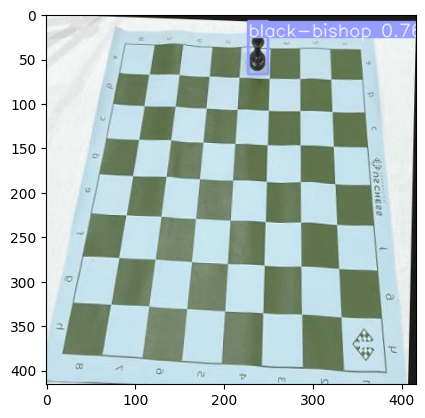

In [30]:
image_test_path = '/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/9a6b61a6d3b3e3ecddc201b097aa02d1_jpg.rf.56770b3733424cb8ed9bf50d15ff31ca.jpg'

results = model.predict(source=image_test_path, 
                        imgsz=416)

test_image = results[0].plot(line_width=2)
plt.imshow(test_image)

In [31]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bishop', 1: 'black-bishop', 2: 'black-king', 3: 'black-knight', 4: 'black-pawn', 5: 'black-queen', 6: 'black-rook', 7: 'white-bishop', 8: 'white-king', 9: 'white-knight', 10: 'white-pawn', 11: 'white-queen', 12: 'white-rook'}
 obb: None
 orig_img: array([[[243, 245, 245],
         [240, 242, 242],
         [233, 235, 235],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        [[249, 251, 251],
         [249, 251, 251],
         [249, 251, 251],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        [[244, 246, 246],
         [245, 247, 247],
         [246, 248, 248],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        ...,
 
        [[178, 190, 194],
         [177, 189, 193],
         [174,

In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16620, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 16620 (delta 55), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16620/16620), 15.15 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (11408/11408), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [26]:
!python export.py --img 416 --data /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/data.yaml.yaml --weights /kaggle/working/runs/detect/train2/weights/best.pt --include onnx --opset 12 

export: data=/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/data.yaml.yaml, weights=['/kaggle/working/runs/detect/train2/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.13 torch-2.1.2 CPU

YOLOv5s summary (fused): 193 layers, 9116567 parameters, 0 gradients, 23.9 GFLOPs

PyTorch: starting from /kaggle/working/runs/detect/train2/weights/best.pt with output shape (1, 17, 3549) (17.6 MB)

ONNX: starting export with onnx 1.16.0...
ONNX: export success ✅ 1.1s, saved as /kaggle/working/runs/detect/train2/weights/best.onnx (34.9 MB)

Export complete (1.6s)
Results saved to /kaggle/working/runs/detect/train2/weights
Detect:          python predict.py --weights /k